In [3]:
import pandas as pd

df_spotify = pd.read_csv("../data/df_spotify_clean.csv")

# Memoria Exploratory Data Analysis: Spotify Database

En este documento hago un resumen del proceso de realización de la limpieza y análisis de datos que he llevado a cabo sobre la base de datos de Spotify.

## Hipótesis:

Mi principal hipótesis a la hora de realizar el análisis es que hay ciertos rasgos de las canciones que favorecen a su popularidad.

### Busqueda y limpieza de datos:

Para mi análisis, encontré 4 datasets diferentes en kaggle.com (artists.csv, Spotify_dataset.csv, SpotifyFeatures.csv y tracks.csv).

Tras una primera inspección de esos 4 datasets, terminé quedandome con 2:  

+ Spotify_dataset.csv --> Que contiene la misma información que SpotifyFeatures.csv y artists.csv, características y rasgos de las canciones.

+ tracks.csv --> Que contiene una lista de los tracks de spotify hasta 2021.  


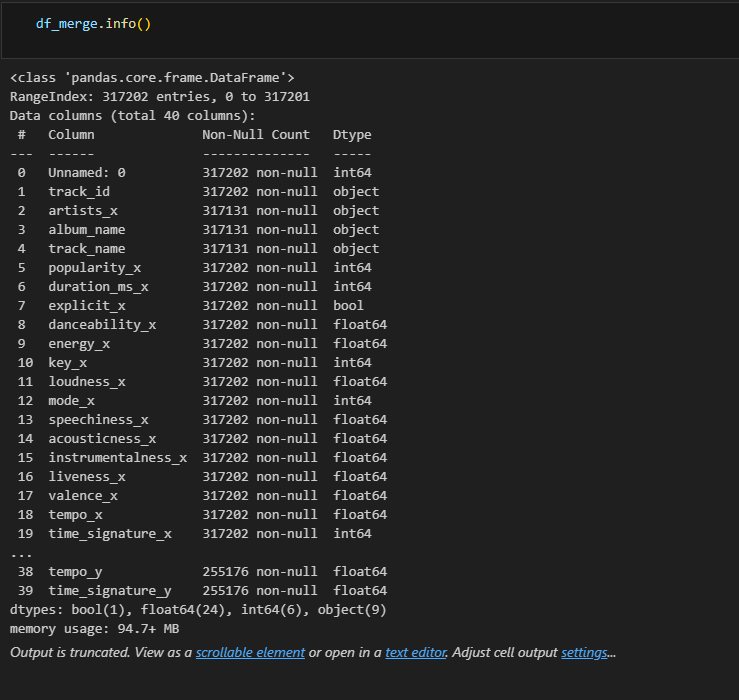

Sobre este df_merge empiezo la limpieza, elimino las columnas que no necesito y los duplicados, que eran bastantes.  



Un ejemplo de por qué hay tantos duplicados es porque hay diferentes versiones de una misma canción:

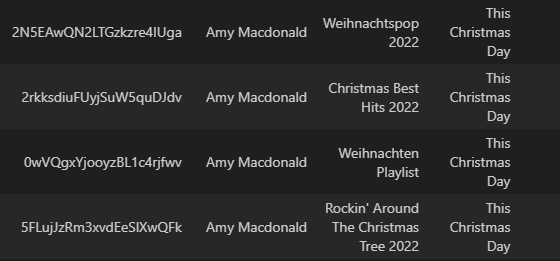

Este es el DF resultante:

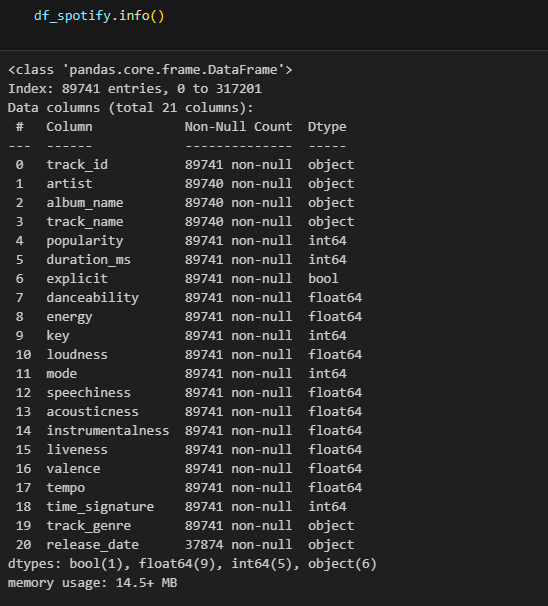

Una de las transformaciones importantes la hago sobre la columna "release_date", para facilitar el análisis, me quedo solo con el año de lanzamiento y la transforma a tipo date:  



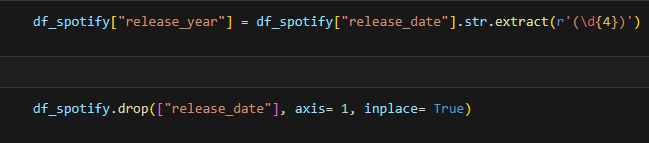

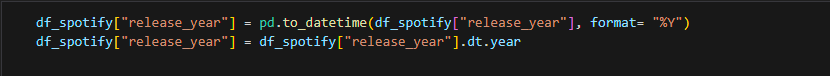

Finalmente transformo la columna de duración de milisegundos a minutos y ordeno el dataframe por popularidad:

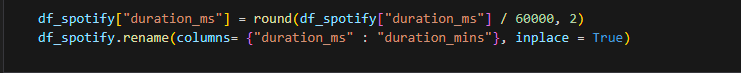

### Visualizaciones:

Para las visualizaciones he utilizado la biblioteca Seaborn, en una paleta de colores pastel y reduciendo al máximo la información no necesaria para mantener una visualización clara.  

Aquí algunos ejemplos:

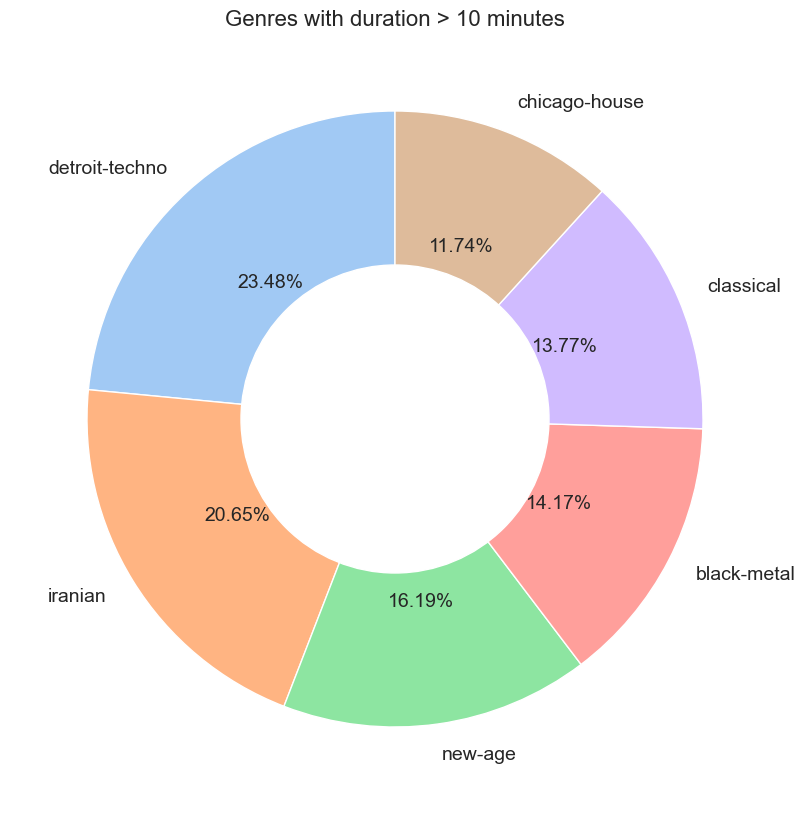

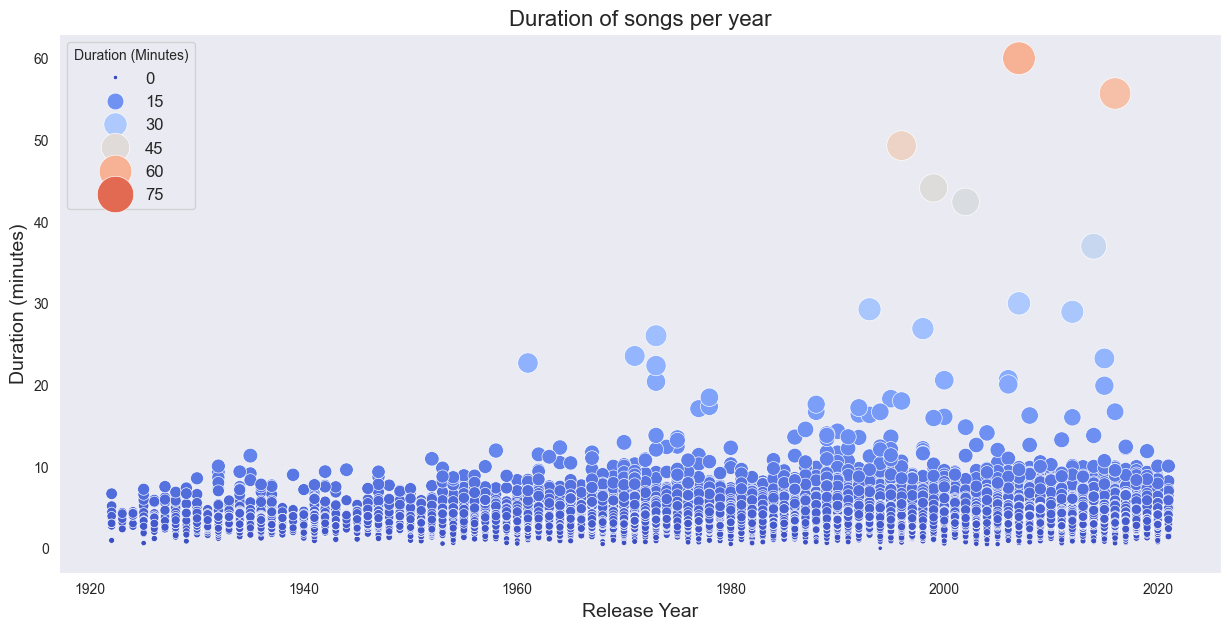

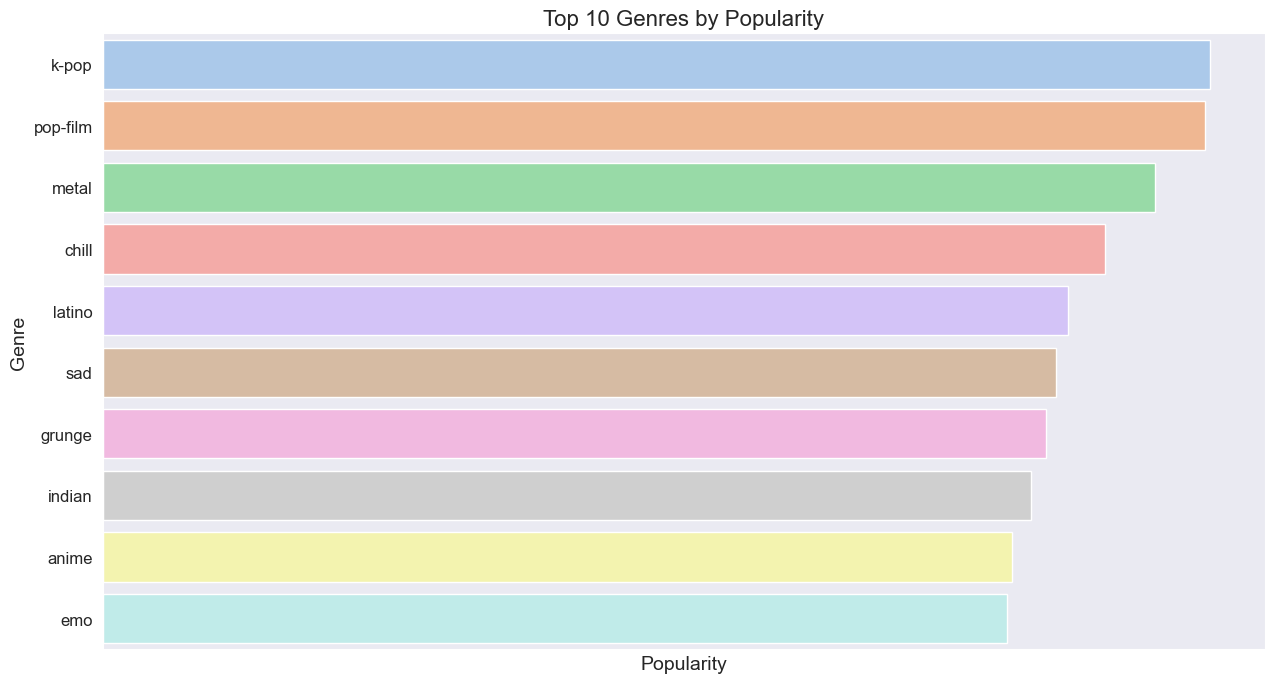

## Análisis:

### Primero hago un análisis global de la distribución de las canciones en el dataset:

#### Descripción de cada columna:

+ track_id: Identificador único para cada canción.
+ artist: Artista.
+ album_name: Nombre del album al que pertenece la canción.
+ track_name: Nombre de la canción.
+ popularity: Indíca el nivel de popularidad de la canción.
+ duration_mins: Duración de la canción en minutos. 
+ explicit: Indíca si la canción es explícita o no. (0 = No explícita, 1 = explícita).
+ danceability: Bailabilidad, de 0 a 1, a mayor valor, más bailable es la canción.
+ energy: Energía, de 0 a 1, a mayor valor, más enérgica es la canción.
+ key: Clave musical o escala en la que está escrita la canción, enpezando en 0 como DO, incrementa un semitono por cada valor --> 0 = C, 1 = C#, 2 = D, 3 = D#, 4 = E, 5 = F, 6 = F#, 7 = G, 8 = G#, 9 = A, 10 = A#.
+ loudness: Medido en (db), a mayor dbs, más volumen tiene la canción. Recordar que el estandar para servicios de streaming es de -14 dbs LUFS
+ mode: Tonalidad de la canción: 0 = Tonalidad menor, 1 = Tonalidad Mayor.
+ speechiness: De 0 a 1, a mayor valor, más letra tiene la canción.
+ acousticness: De 0 a 1, a mayor valor, más acústica es la canción.
+ instrumentalness: De 0 a 1, a mayor valor, más instrumentización hay en la canción.
+ liveness: De 0 a 1, a mayor valor, más posible que la canción sea una grabación en directo.
+ valence: De 0 a 1, a mayor valor, la canción genera un estado de ánimo más positivo.
+ tempo: BPMs o pulsaciones por minuto de la canción.
+ time_signature: Compás de la canción (número de negras por cada compás) 4/4, 3/4, 2/4, etc...
+ track_genre: El género musical de la canción.
+ release_year: El año de lanzamiento.


#### Géneros más y menos presentes:

Los géneros más presentes en el dataset son:

+ Acoustic
+ Afrobeat  
+ Tango
+ Ambient
+ Alt-Rock
+ Cantopop

Los géneros menos presentes son:  

+ Reggaeton
+ Indie
+ House
+ Punk
+ Metal

Aquí es donde puedo ver el primer error que he cometido en este análisis, y es que los géneros están mal categorizados, usan diferentes nombres para referirse al mismo género (latino, latin,reggaeton), pasa lo mismo con el rock alternativo (indie, alt-rock, etc)

In [7]:
print("Hay", df_spotify.track_genre.nunique(), "géneros diferentes")
print(df_spotify.track_genre.unique())

Hay 113 géneros diferentes
['dance' 'hip-hop' 'latin' 'piano' 'pop' 'reggae' 'alt-rock' 'chill'
 'garage' 'latino' 'rock' 'folk' 'indie' 'funk' 'country' 'soul'
 'indie-pop' 'hard-rock' 'indian' 'k-pop' 'british' 'emo' 'synth-pop'
 'alternative' 'electro' 'club' 'j-pop' 'metal' 'edm' 'sleep' 'german'
 'ambient' 'anime' 'disco' 'swedish' 'dancehall' 'singer-songwriter' 'sad'
 'punk-rock' 'brazil' 'acoustic' 'punk' 'r-n-b' 'spanish' 'reggaeton'
 'house' 'blues' 'rock-n-roll' 'deep-house' 'hardcore' 'french' 'pop-film'
 'chicago-house' 'jazz' 'power-pop' 'children' 'salsa' 'j-dance' 'turkish'
 'psych-rock' 'grunge' 'show-tunes' 'ska' 'comedy' 'afrobeat' 'industrial'
 'party' 'progressive-house' 'j-rock' 'dub' 'cantopop' 'groove' 'disney'
 'electronic' 'mandopop' 'classical' 'metalcore' 'rockabilly' 'trance'
 'hardstyle' 'world-music' 'new-age' 'drum-and-bass' 'bluegrass' 'techno'
 'minimal-techno' 'opera' 'mpb' 'breakbeat' 'happy' 'death-metal' 'pagode'
 'j-idol' 'malay' 'trip-hop' 'goth'

muchos de estos género deberian agruparse para hacer más representativo el análisis

#### Número de canciones por año:

A partir de los años '80 se produce un gran incremento de canciones, esto se debe a la mayor facilidad de acceso a equipos de grabación, nuevos soportes como el CD y la mejora de softwares de grabación

#### Duración de las canciones:

Del mismo modo que los nuevos medios de grabación hacen que sea posible el lanzamiento de mayor capacidad de canciones, nuevos soportes como la cinta magnética, el CD y más tarde el MP3, hacen que sea posible aumentar la duración de las canciones sobre todo a partir de 1990

Los géneros con canciones de más de 10 minutos son:  

+ Techno
+ House
+ New-Age
+ Música Clásica
+ Música Iraní

#### Géneros más populares

El género más popular en spotify es el K-Pop, seguido por Pop-film que hace referencia a canciones de películas populares. Seguido en 3er lugar por el metal,  aún siendo un estilo musical que no está visto como comercial.  

como sorpresa tenemos la música india como el 7º género más popular de spotify.

### Análisis específico de las características de los tracks

+ Las variables más correlacionadas positivamente son: energy - loudness y danceability - valence.  
+ Las relacionada más negativamente es acousticness - energy.

+ No hay una gran diferencia entre la popularidad entre tonalidades mayores y menores. Se podría pensar que las tonalidades mayores al sonar más "alegres" serían más populares, pero como hemos podido ver en el top 10 de géneros más populares, "sad" se encontraba en el top 10.

+ En cuanto a la bailabilidad, se podría pensar que las canciones en tonalidad mayor (más alegres) serían más bailables, pero se puede ver como no hay una gran diferencia.

+ Tempo: Como era de esperar, la gran mayoría de las canciones están compuestas en un compás de 4/4.  Hay un pequeño segmento pero significativo de canciones en 3/4 y una muy pequeña parte de canciones que están en otros tempos.

+ La gran mayoría de canciones no son explicitas, esto puede deberse a que muchos artistas con canciones explicitas sacan una segunda versión de la canción censurada o con la letra cambiada para poder ser emitida en radio o televisión.

+ Aun así, podemos ver como las marcadas como explicitas tienen algo más de popularidad que las no explicitas.

+ Las canciones más populares tienen un nivel más alto de bailabilidad.

+ Las canciones más populares duran entre 2.5 y 4 minutos. A partir de 4 minutos no hay ninguna entre las más populares.

+ Desde el '64 se ha producido un incremento gradual en popularidad. Cabe destacar que a partir de 2019 la popularidad de los nuevos lanzamientos empieza a descender.

+ El tempo favorito de los usuarios está entre 90-100 BPMs (Más usado en música latina, reggeaton, etc), entre 120 y 130, que se encuntra la música electrónica comercial, y a partir de 135 que es el utilizado en Rock, Metal, Hardcore...

+ En relacion con artistas más populares y su género: en primer lugar se encuentra BTS, un grupo de k-Pop, seguido por grupos alternative, garage y rock.  Como sorpresa encontramos a CoComelon (infantil) como uno de los artistas más populares.

+ Tempo: Como se ha comentado antes, la gran mayoria de canciones se encuentran entre los 125 y 130 BPMs que corresponden a la musica comercial, entre los 80 y los 100 encontramos también una gran cantidad que corresponde al reggeaton y demás estilos latinos, a partir de los 140 la cantidad de canciones empieza a disminuir, esto se corresponde a diferentes generos de metal, hardcore, hardtechno y demás cores.  

+ Duration: La gran mayoría de canciones está entre los 2 y 3 minutos, siendo a partir de los 5 casos excepcionales. hay canciones que llegan hasta 90 minutos de duración, esto corresponde a bandas sonoras de peliculas y música clásica.  

+ Acousticness: La grán mayoría de canciones son poco acusticas.  

+ Energy: Hay un crecimiento constante en la cantidad de energía de los tracks.  

+ Danceability: La mayoría de canciones tienen un valor medio de bailabilidad.  

+ Speachiness: Casi todas las canciones tienen un porcentaje bajo de palabra hablada respecto a la duración completa de la canción.

+ Time Signature: Como hemos visto antes la mayoría de canciones están en 4/4, seguido de 3/4 y con valores también en 1/4 y 5/4.

+ Loudness: Este gráfico resulta bastante interesante, el estandar de volumen en la masterización para servicios de streaming se encuentra entre los -17dbs y -14dbs (en el caso concreto de spotify es -14dbs). Sin embargo se puede ver como la gran mayoria de canciones están por encima de ese estandar, alrededor de los -6dbs, esto se debe a un fenomemo conocido como "loudness war", en los ultimos años los artistas han empezado a masterizar sus canciones cada vez con más volumen, para sonar más fuerte, más potente. Esto tiene poco sentido ya que las plataformas de streaming aplican compresión y limitación a las canciones por encima de -14dbs, lo que lleva a una perdida de dinámica en el sonido y de calidad de la canción.  

+ Liveness: La mayoría de las canciones tienen un grado bajo de directo.  

+ Key: Resulta interesante ver como parece haber una preferencia por ciertas escalas, destacan DO, MI y SOL, mientras que la escala menos utilizada es RE#.

Para terminar vemos cuales han sido las canciones más populares de spotify.

Se puede destacar:  

+ 6 de las 10 canciones más populares son de reggeaton (aunque una de ellas la marque como hip-hop), otras 3, Dance, y solo 1 de un género diferente (piano, que debería ser pop).  

+ 4 de las 10 canciones más populares son de Bad Bunny.

+ Aun siendo el género más popular el k-pop, y el artista más popular BTS, en el top 10 de canciones no aparece ni k-pop, ni BTS.

El segundo gran error que he cometido es que en las canciones que son colaboraciones, el campo de artista cuenta a los dos artistas como uno solo, utilizando ";" como separador.  

Esto hace que la distribución de artistas populares no sea fiel a la realidad, para solucionarlo debería haber creado una segunda columna de artista y dividirlos según ese separador.

### Conclusión:

Aunque mi hipótesis principal era que los rasgos pueden influir en la popularidad, no puedo afirmar que esto sea realmente así.  

Si que se puede ver que los usuarios pueden tener algo más de preferencia por diferentes claves, tempos o modos tonales pero ninguna de estas características es decisiva en la popularidad de una canción.  

De ser así, el éxito de la música estaría reducido a una "formula mágica", Hago una cancion a 128 BPM, en SOL Mayor, explícita y masterizada a -6dbs y tengo el éxito asegurado...  

Pero obviamente esto no es así. Si que estas características pueden ayudar al usuario a que la canción le pueda "entrar" mejor de primeras, pero hay muchos factores externos que afectan a la popularidad de una canción, como la popularidad del artista, la aparición de la canción en diferentes medios, la estructura de esta, etc...  

